<a href="https://colab.research.google.com/github/rahulrajpr/natural_language_processing/blob/main/Glove_BERT_SentimentsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Environment

In [1]:
from IPython.core.display import clear_output
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/hf_requirements.txt
!pip install -r hf_requirements.txt
clear_output()

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hf
import random
import os
import sys
print(f'\nPython version : {sys.version}\n')
print(f'Tensorflow version : {tf.__version__}')


Python version : 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]

Tensorflow version : 2.12.0


# Loading IMDB Data

In [3]:
imdb_train, info = tfds.load(name = 'imdb_reviews', with_info = True, as_supervised= True, split = 'train')
imdb_test = tfds.load(name = 'imdb_reviews', as_supervised= True, split = 'test')

imdb_train, imdb_test

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5ZM36W/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5ZM36W/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5ZM36W/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

# Convert Prefetch Dataset to Array

In [4]:
train_data, train_label = hf.prefetch_dataset_to_array(dataset = imdb_train)
test_data, test_label = hf.prefetch_dataset_to_array(dataset = imdb_test)

train_data[:3], train_label[:3]

Numpy arrays returned as --> (data, labels)
Numpy arrays returned as --> (data, labels)


(array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
        b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plo

# Show Random Samples

In [5]:
random_index = random.sample(range(0, len(train_data)),5)
for ind in random_index:
  random_label = train_label[ind]
  random_sentence = train_data[ind]
  print(random_label,random_sentence)

0 b'I caught this film on AZN on cable. It sounded like it would be a good film, a Japanese "Green Card". I can\'t say I\'ve ever disliked an Asian film, quite the contrary. Some of the most incredible horror films of all time are Japanese and Korean, and I am a HUGE fan of John Woo\'s Hong Kong films. I an not adverse to a light hearted films, like Tampopo or Chung King Express (two of my favourites), so I thought I would like this. Well, I would rather slit my wrists and drink my own blood than watch this laborious, badly acted film ever again.<br /><br />I think the director Steven Okazaki must have spiked the water with Quaalude, because no one in this film had a personality. And when any of the characters DID try to act, as opposed to mumbling a line or two, their performance came across as forced and incredibly fake. I honestly did not think that anyone had ever acted before...the ONLY person who sounded genuine was Brenda Aoki.. I find it amazing that this is promoted as a comed

# Text Standardization

In [6]:
train_data = [hf.text_standardization(x) for x in train_data]
test_data = [hf.text_standardization(x) for x in test_data]

train_data[:5]

['this was an absolutely terrible movie dont be lured in by christopher walken or michael ironside both are great actors but this must simply be their worst role in history even their great acting could not redeem this movies ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the columbian rebels were making their cases for revolutions maria conchita alonso appeared phony and her pseudolove affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actors like christopher walkens good name i could barely sit through it',
 'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the sette and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly 

> Lemmatize the text

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
# create a function to lemmatize the text
def lemmatize_text(text):
  tokens = word_tokenize(text)
  lemma = [lemmatizer.lemmatize(word = x) for x in tokens]
  output = ' '.join(lemma)
  return output

In [9]:
train_data = [lemmatize_text(x) for x in train_data]
test_data = [lemmatize_text(x) for x in test_data]

train_data[:5]

['this wa an absolutely terrible movie dont be lured in by christopher walken or michael ironside both are great actor but this must simply be their worst role in history even their great acting could not redeem this movie ridiculous storyline this movie is an early ninety u propaganda piece the most pathetic scene were those when the columbian rebel were making their case for revolution maria conchita alonso appeared phony and her pseudolove affair with walken wa nothing but a pathetic emotional plug in a movie that wa devoid of any real meaning i am disappointed that there are movie like this ruining actor like christopher walkens good name i could barely sit through it',
 'i have been known to fall asleep during film but this is usually due to a combination of thing including really tired being warm and comfortable on the sette and having just eaten a lot however on this occasion i fell asleep because the film wa rubbish the plot development wa constant constantly slow and boring th

# Define Global Variables

In [10]:
BATCH_SIZE = 100
OOV_TOKEN = '<OOV>'

PAD_LEN = 124
PAD_STYLE = 'post'
TRUNC_STYLE = 'post'
EMBED_LEN = 50

# Tokenize the Text

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
tokenizer = Tokenizer(oov_token = OOV_TOKEN)

In [13]:
tokenizer.fit_on_texts(train_data)

In [14]:
train_tokenized = tokenizer.texts_to_sequences(train_data)
test_tokenized = tokenizer.texts_to_sequences(test_data)

# Pad Sequences

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
train_pad = pad_sequences(train_tokenized, maxlen = PAD_LEN, padding = PAD_STYLE, truncating = TRUNC_STYLE)
test_pad = pad_sequences(test_tokenized, maxlen = PAD_LEN, padding = PAD_STYLE, truncating = TRUNC_STYLE)

train_pad[:3]

array([[   10,    14,    31,   426,   397,    13,    92,    26,  9481,
            9,    30,  1333,  3390,    39,   471,  9248,   202,    23,
           85,   110,    18,    10,   223,   330,    26,    67,   245,
          165,     9,   488,    56,    67,    85,   119,    96,    20,
         5152,    10,    13,   645,   726,    10,    13,     7,    31,
          404,  4955,   167,  2381,   336,     2,    88,  1208,    71,
           68,   148,    51,     2, 31646,  2950,    68,   251,    67,
          374,    17,  2453,  2628, 18448, 17481,  1420,  4615,     4,
           37, 51188,  1331,    16,  3390,    14,   162,    18,     3,
         1208,   867,  6931,     9,     3,    13,    12,    14,  3815,
            5,    99,   153,  1168,    11,   240,   693,    12,    38,
           23,    13,    35,    10,  6754,   110,    35,  1333, 12452,
           48,   334,    11,    96,  1142,   833,   145,     8,     0,
            0,     0,     0,     0,     0,     0,     0],
       [   11,    2

## Loading Trained GloVe Embeddings

`GloVe` (Global Vectors for Word Representation) : Algorithm used for generating word embeddings in natural language processing (NLP). Word embeddings are vector representations of words that capture semantic relationships between words based on their co-occurrence patterns in a given corpus of text.

The GloVe algorithm aims to learn word representations by analyzing the statistical properties of word co-occurrence

In [17]:
# Download the GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-05-09 07:47:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-09 07:47:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-09 07:47:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

> Lets unzip the file

In [18]:
hf.unzip_untar_data('glove.6B.zip')

File extension : .zip
File extracting.......
Completed successfully


> List the files available in the folder

In [19]:
[x for x in os.listdir() if x.find('glove') >= 0 and x.find('.zip') < 0]

['glove.6B.200d.txt',
 'glove.6B.300d.txt',
 'glove.6B.50d.txt',
 'glove.6B.100d.txt']

Note : We are using the 50 f Glove vectors for the examples

In [20]:
# Get the lines from the txt file

with open('glove.6B.50d.txt') as file:
  lines = file.readlines()

lines[:3]

['the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581\n',
 ', 0.013441 0.23682 -0.16899 0.40951 0.63812 0.47709 -0.42852 -0.55641 -0.364 -0.23938 0.13001 -0.063734 -0.39575 -0.48162 0.23291 0.090201 -0.13324 0.078639 -0.41634 -0.15428 0.10068 0.48891 0.31226 -0.1252 -0.037512 -1.5179 0.12612 -0.02442 -0.042961 -0.28351 3.5416 -0.11956 -0.014533 -0.1499 0.21864 -0.33412 -0.13872 0.31806 0.70358 0.44858 -0.080262 0.63003 0.32111 -0.46765 0.22786 0.36034 -0.37818 -0.56657 0.044691 0.30392\n',
 '. 0.15164 0.30177 -0.16763 0.17684 0.31719 0.33973 -0.43478 -0.31086 -0.44999 -0.29486 0.16608 0.11963 -0.

In [21]:
lines[0] # the first item in the line is the word and the rest are the embedding values

'the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581\n'

In [22]:
print('Lets look at one of the sample data from the text file')
word = lines[0].split()[0]
embed = np.array(lines[0].split()[1:])

print(f'\nThe word is : {word}\n')
print(f'The Embedding :\n\n{embed}')

Lets look at one of the sample data from the text file

The word is : the

The Embedding :

['0.418' '0.24968' '-0.41242' '0.1217' '0.34527' '-0.044457' '-0.49688'
 '-0.17862' '-0.00066023' '-0.6566' '0.27843' '-0.14767' '-0.55677'
 '0.14658' '-0.0095095' '0.011658' '0.10204' '-0.12792' '-0.8443'
 '-0.12181' '-0.016801' '-0.33279' '-0.1552' '-0.23131' '-0.19181'
 '-1.8823' '-0.76746' '0.099051' '-0.42125' '-0.19526' '4.0071' '-0.18594'
 '-0.52287' '-0.31681' '0.00059213' '0.0074449' '0.17778' '-0.15897'
 '0.012041' '-0.054223' '-0.29871' '-0.15749' '-0.34758' '-0.045637'
 '-0.44251' '0.18785' '0.0027849' '-0.18411' '-0.11514' '-0.78581']


> Record the word and the corresponding embedding into a dictionary

In [23]:
glove_dict = {}
words_with_erros = []

for line in lines:
  line_to_items = line.split()
  word = line_to_items[0]
  vector = line_to_items[1:]
  vector = np.array(vector, dtype = np.float32)

  if vector.shape[0] == 50:
    glove_dict[word] = vector
  else:
    words_with_erros.append(word)

print(f'The nunber of words with embeddings : {len(glove_dict.keys())}')
print(f'The number of words with errors {len(words_with_erros)}')

The nunber of words with embeddings : 400000
The number of words with errors 0


# Building an Embedding Matrix

> Create an embedding matrix of zeros with embedding size and vocabulary size

In [24]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'a': 3,
 'and': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'it': 8,
 'in': 9,
 'this': 10,
 'i': 11,
 'that': 12,
 'movie': 13,
 'wa': 14,
 'film': 15,
 'with': 16,
 'for': 17,
 'but': 18,
 'on': 19,
 'not': 20,
 'he': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'at': 28,
 'all': 29,
 'by': 30,
 'an': 31,
 'who': 32,
 'they': 33,
 'from': 34,
 'like': 35,
 'so': 36,
 'her': 37,
 'there': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 'ha': 42,
 'out': 43,
 'if': 44,
 'some': 45,
 'time': 46,
 'what': 47,
 'good': 48,
 'more': 49,
 'very': 50,
 'when': 51,
 'character': 52,
 'story': 53,
 'she': 54,
 'get': 55,
 'even': 56,
 'up': 57,
 'no': 58,
 'can': 59,
 'would': 60,
 'my': 61,
 'make': 62,
 'which': 63,
 'only': 64,
 'see': 65,
 'really': 66,
 'their': 67,
 'were': 68,
 'had': 69,
 'me': 70,
 'scene': 71,
 'than': 72,
 'we': 73,
 'much': 74,
 'well': 75,
 'been': 76,
 'people': 77,
 'will': 78,
 'into': 79,
 'because': 80,
 'other': 81,


In [25]:
len(word_index)

133639

In [26]:
vocab_arrived_size = len(word_index.keys())

In [27]:
print(vocab_arrived_size,EMBED_LEN)
embedding_matrix = np.zeros(shape = (vocab_arrived_size,EMBED_LEN))
print(embedding_matrix.shape)

133639 50
(133639, 50)


> Lets record the embedding value to the matricx for each word

In [28]:
unknown_words = set()

for word in word_index.keys():
  if word == OOV_TOKEN:
    None
  else:
    embedding = glove_dict.get(word)
    id = word_index[word]

    if embedding is not None:
        embedding_matrix[id,:] = embedding
    else:
      unknown_words.add(word)

print(f'The vocabulary size : {len(word_index.keys())}')
print(f'The number of unknown words in the give vocabulary : {len(unknown_words)}')
print(f'The shape of the embedding : {embedding_matrix.shape}')

The vocabulary size : 133639
The number of unknown words in the give vocabulary : 79544
The shape of the embedding : (133639, 50)


# Create the data pipeline

In [29]:
train_ds = tf.data.Dataset.from_tensor_slices((train_pad, train_label))
test_ds = tf.data.Dataset.from_tensor_slices((test_pad, test_label))

train_ds, test_ds

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(124,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(124,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [30]:
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds, test_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 124), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 124), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# Building the Model

- Bi LSTM
- with Glove Embedding Weights

In [31]:
from tensorflow.keras import layers

In [32]:
inputs = tf.keras.Input(shape = (None,), name = 'input_layer')
x = layers.Embedding(input_dim = vocab_arrived_size, output_dim = EMBED_LEN, mask_zero = True, weights = [embedding_matrix], trainable = False)(inputs)
x = layers.Bidirectional(layers.LSTM(units = 64, return_sequences = True))(x)
x = layers.Dropout(rate = 0.40)(x)
x = layers.Bidirectional(layers.LSTM(units = 64))(x)
x = layers.Dropout(rate = 0.35)(x)
x = layers.Dense(units = 16, activation = 'relu')(x)
outputs = layers.Dense(units = 1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name = 'model_1')

model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 50)          6681950   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        58880     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0   

> Fit the model

In [33]:
history_1 = model_1.fit(train_ds, 
                        epochs = 25,
                        steps_per_epoch = len(train_ds),
                        validation_data = test_ds, 
                        validation_steps = len(test_ds),
                        callbacks = [hf.create_model_checkpoint(monitor = 'val_accuracy', model_name = model_1.name),
                                     hf.reduce_learning_rate_callback(monitor = 'val_accuracy', patience = 6)])

Epoch 1/25
250/250 [==============================] - 38s 64ms/step - loss: 0.5805 - accuracy: 0.6916 - val_loss: 0.5454 - val_accuracy: 0.7240 - lr: 0.0010
Epoch 2/25
250/250 [==============================] - 11s 46ms/step - loss: 0.5021 - accuracy: 0.7560 - val_loss: 0.4820 - val_accuracy: 0.7659 - lr: 0.0010
Epoch 3/25
250/250 [==============================] - 11s 46ms/step - loss: 0.4807 - accuracy: 0.7714 - val_loss: 0.4711 - val_accuracy: 0.7782 - lr: 0.0010
Epoch 4/25
250/250 [==============================] - 11s 46ms/step - loss: 0.4498 - accuracy: 0.7877 - val_loss: 0.4361 - val_accuracy: 0.7932 - lr: 0.0010
Epoch 5/25
250/250 [==============================] - 11s 44ms/step - loss: 0.4272 - accuracy: 0.8040 - val_loss: 0.4461 - val_accuracy: 0.7885 - lr: 0.0010
Epoch 6/25
250/250 [==============================] - 11s 43ms/step - loss: 0.4130 - accuracy: 0.8108 - val_loss: 0.4138 - val_accuracy: 0.8095 - lr: 0.0010
Epoch 7/25
250/250 [==============================] - 12s 

In [34]:
model_1.load_weights('checkpoints/model_1.h5')

In [35]:
model_1.evaluate(test_ds)

250/250 [==============================] - 3s 13ms/step - loss: 0.3961 - accuracy: 0.8185


[0.39612120389938354, 0.8184800148010254]

In [36]:
# function to show the classification results

def calculate_results(model, val_ds):
  pred_prob = np.squeeze(model.predict(test_ds))
  pred = np.round(pred_prob)
  y_true = [x.numpy() for x in val_ds.unbatch().map(lambda x,y : y)]
  y_true = np.array(y_true)
  results = hf.calculate_results(y_true = y_true, y_pred = pred)
  return results

In [37]:
results_1 = calculate_results(model_1, test_ds)
results_1

250/250 [==============================] - 8s 13ms/step


{'accuracy': 0.81848,
 'precision': 0.8185716344546492,
 'recall': 0.81848,
 'f1': 0.8184669458854654}

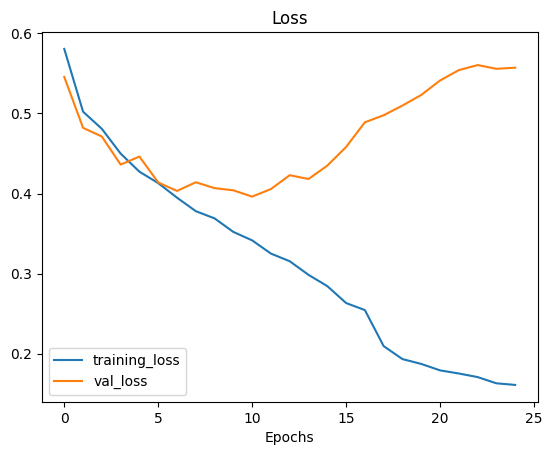

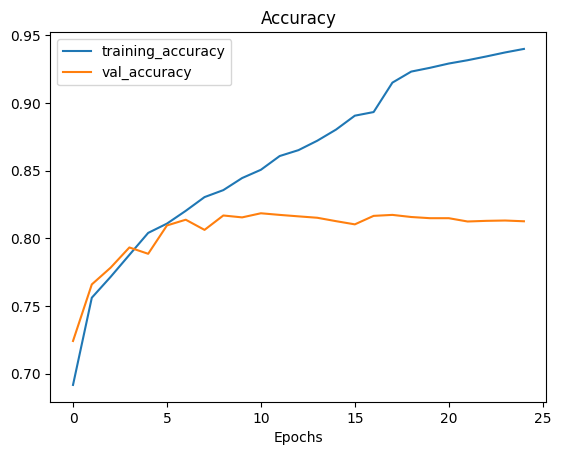

In [38]:
hf.plot_loss_curves(history_1)

# Model 2

-  Fine Tuning the Glove Embedding

In [39]:
# Making the embedding layer, Trainable = True

inputs = tf.keras.Input(shape = (None,), name = 'input_layer')
x = layers.Embedding(input_dim = vocab_arrived_size, output_dim = EMBED_LEN, mask_zero = True, weights = [embedding_matrix], trainable = True)(inputs) # Trainable = True
x = layers.Bidirectional(layers.LSTM(units = 64, return_sequences = True))(x)
x = layers.Dropout(rate = 0.40)(x)
x = layers.Bidirectional(layers.LSTM(units = 64))(x)
x = layers.Dropout(rate = 0.35)(x)
x = layers.Dense(units = 16, activation = 'relu')(x)
outputs = layers.Dense(units = 1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2')

model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 50)          6681950   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        58880     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0   

In [40]:
history_2 = model_2.fit(train_ds, 
                        epochs = 25,
                        steps_per_epoch = len(train_ds),
                        validation_data = test_ds, 
                        validation_steps = len(test_ds),
                        callbacks = [hf.create_model_checkpoint(monitor = 'val_accuracy', model_name = model_2.name),
                                     hf.reduce_learning_rate_callback(monitor = 'val_accuracy', patience = 6)])

Epoch 1/25
250/250 [==============================] - 68s 205ms/step - loss: 0.5575 - accuracy: 0.7044 - val_loss: 0.4736 - val_accuracy: 0.7724 - lr: 0.0010
Epoch 2/25
250/250 [==============================] - 30s 119ms/step - loss: 0.3929 - accuracy: 0.8268 - val_loss: 0.4125 - val_accuracy: 0.8243 - lr: 0.0010
Epoch 3/25
250/250 [==============================] - 19s 76ms/step - loss: 0.2889 - accuracy: 0.8814 - val_loss: 0.3970 - val_accuracy: 0.8231 - lr: 0.0010
Epoch 4/25
250/250 [==============================] - 17s 69ms/step - loss: 0.2015 - accuracy: 0.9255 - val_loss: 0.5143 - val_accuracy: 0.8228 - lr: 0.0010
Epoch 5/25
250/250 [==============================] - 18s 73ms/step - loss: 0.1197 - accuracy: 0.9578 - val_loss: 0.5491 - val_accuracy: 0.8150 - lr: 0.0010
Epoch 6/25
250/250 [==============================] - 15s 61ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.8303 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 7/25
250/250 [==============================] - 16

In [41]:
model_2.load_weights('checkpoints/model_2.h5')

In [42]:
results_2 = calculate_results(model_2, test_ds)
results_2

250/250 [==============================] - 7s 12ms/step


{'accuracy': 0.82432,
 'precision': 0.8245982840815516,
 'recall': 0.82432,
 'f1': 0.8242823385038986}

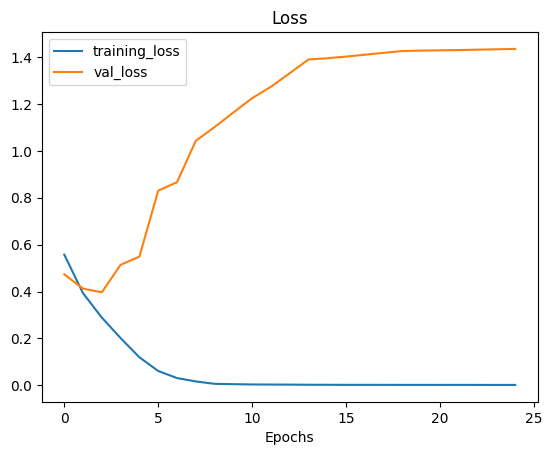

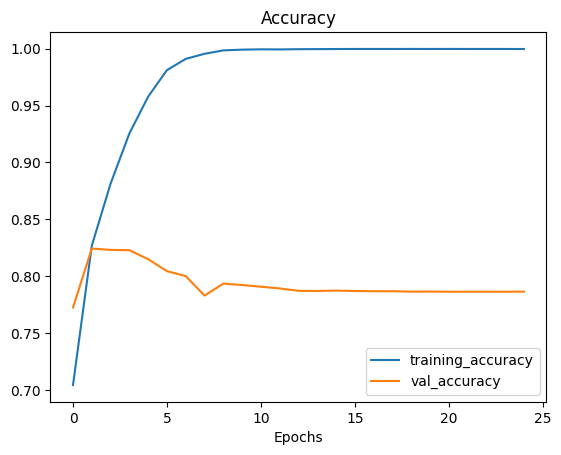

In [43]:
hf.plot_loss_curves(history_2)

# BERT Based Transfer Learning With HuggingFace

In [44]:
# To clean up and free up GPU memory
tf.keras.backend.clear_session()

In [45]:
!pip install transformers
clear_output()

In [46]:
from transformers import BertTokenizer

In [47]:
bert_name = 'bert-base-cased'

bert_tokenizer = BertTokenizer.from_pretrained(bert_name,
                                               do_lower_case=False,
                                               add_special_tokens=True,
                                               max_length=150,
                                               padding=True,
                                               truncation=True)

## Tokenization and Normalization with BERT

> Sample Tokenization

In [48]:
sample_sentence = "This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside."

sample_tokens = bert_tokenizer.encode(sample_sentence)
sample_decode = bert_tokenizer.decode(sample_tokens)

print(f'Sample encoding (tokenizing):\n{sample_tokens}\n')
print(f'Sample decoding : \n{sample_decode}')

Sample encoding (tokenizing):
[101, 1188, 1108, 1126, 7284, 6434, 2523, 119, 1790, 112, 189, 1129, 19615, 1181, 1107, 1118, 4978, 10065, 1424, 1137, 1847, 5621, 5570, 119, 102]

Sample decoding : 
[CLS] This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. [SEP]


In [49]:
bert_tokenizer = BertTokenizer.from_pretrained(bert_name,
                                               do_lower_case=False,
                                               add_special_tokens=True,
                                               max_length=150,
                                               padding=True,
                                               truncation=True)

> Create function to tokenize using the bert tokenizer

In [50]:
# .encode and .encode_plus : .encode_plus give additional informtaion as output such as return_attention_mask, return_token_type_ids etc

def bert_encoder(text):

  encoded = bert_tokenizer.encode_plus(text = text, 
                                       add_special_tokens=True,
                                       max_length=150,
                                       pad_to_max_length=True,
                                       return_attention_mask=True,
                                       return_token_type_ids=True,
                                       truncation=True)
  input_ids = encoded['input_ids']
  token_type_id = encoded['token_type_ids']
  attention_mask = encoded['attention_mask']

  return (input_ids,token_type_id,attention_mask)

> Encode the Train Data

In [51]:
bert_train = [bert_encoder(x) for x in train_data]

bert_train = np.array(bert_train)
bert_train.shape

(25000, 3, 150)

> Encode the Test Data

In [52]:
bert_test = [bert_encoder(x) for x in test_data]

bert_test = np.array(bert_test)
bert_test.shape

(25000, 3, 150)

In [53]:
train_reviews, train_segments, train_masks = np.split(bert_train, 3, axis = 1)
test_reviews, test_segments, test_masks = np.split(bert_test, 3, axis = 1)

train_reviews.shape, train_segments.shape, train_masks.shape

((25000, 1, 150), (25000, 1, 150), (25000, 1, 150))

In [54]:
train_reviews = np.squeeze(train_reviews)
train_segments = np.squeeze(train_segments)
train_masks = np.squeeze(train_masks)

test_reviews = np.squeeze(test_reviews)
test_segments = np.squeeze(test_segments)
test_masks = np.squeeze(test_masks)

train_reviews.shape, train_segments.shape, train_masks.shape

((25000, 150), (25000, 150), (25000, 150))

> Convert the labels into categorical

In [55]:
train_label_categorical = tf.keras.utils.to_categorical(train_label, num_classes = 2)
test_label_categorical = tf.keras.utils.to_categorical(test_label, num_classes = 2)

train_label_categorical.shape, test_label_categorical.shape

((25000, 2), (25000, 2))

> Create a function to take data and map into features

In [56]:
def example_to_features(input_ids, attention_masks,token_type_ids,label):
  data_features = {'input_ids':input_ids,
                   'attention_mask':attention_masks,
                   'token_type_ids':token_type_ids}
  features_and_label = (data_features,label)
  return features_and_label

# Create a data pipeline

In [57]:
train_items = (train_reviews,train_masks,train_segments,train_label_categorical)
test_items = (test_reviews,test_masks,test_segments,test_label_categorical)

train_ds_bert = tf.data.Dataset.from_tensor_slices(train_items).map(example_to_features)
test_ds_bert = tf.data.Dataset.from_tensor_slices(test_items).map(example_to_features)

print(train_ds_bert,'\n')
print(test_ds_bert)

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(150,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(150,), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(150,), dtype=tf.int64, name=None)}, TensorSpec(shape=(2,), dtype=tf.float32, name=None))> 

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(150,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(150,), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(150,), dtype=tf.int64, name=None)}, TensorSpec(shape=(2,), dtype=tf.float32, name=None))>


In [58]:
BATCH_SIZE = 16 # reducing the batch because of the graph execution error

train_ds_bert = train_ds_bert.shuffle(100).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds_bert = test_ds_bert.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(train_ds_bert,'\n')
print(test_ds_bert)

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))> 

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [59]:
train_ds_bert.element_spec

({'input_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None),
  'attention_mask': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None),
  'token_type_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None)},
 TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))

## Pre-Built BERT Model for Classification

# Model 3:

> TF Bert Model for Sequence Classification

In [60]:
from transformers import TFBertForSequenceClassification

In [61]:
bert_name = 'bert-base-cased'

model_3 = TFBertForSequenceClassification.from_pretrained(bert_name)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [62]:
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                   optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-5), # check bert documentation
                   metrics = ['accuracy'])

In [63]:
model_3._name = 'model_3'

In [64]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


In [65]:
history_3 = model_3.fit(train_ds_bert,
                        epochs = 2, # bert sugget 2-4 numebrs of epochs
                        steps_per_epoch = len(train_ds_bert)) 

Epoch 1/2
1563/1563 [==============================] - 831s 499ms/step - loss: 0.3485 - accuracy: 0.8444
Epoch 2/2
1563/1563 [==============================] - 773s 495ms/step - loss: 0.1978 - accuracy: 0.9248


In [66]:
model_3.evaluate(test_ds_bert)

1563/1563 [==============================] - 279s 177ms/step - loss: 0.3069 - accuracy: 0.8822


[0.306877076625824, 0.8822399973869324]

# Model 4 :
## Custom Model With BERT

In [67]:
from transformers import TFBertModel

In [83]:
bert_name = 'bert-base-cased'
bert_model = TFBertModel.from_pretrained(bert_name)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [84]:
bert_model.summary()

Model: "tf_bert_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


> Define Input layers

In [85]:
from tensorflow.keras import layers

In [86]:
max_seq_len = 150

input_input_ids = layers.Input(shape = (max_seq_len,), dtype = tf.int64, name = 'input_ids')
input_attention_mask = layers.Input(shape = (max_seq_len,), dtype = tf.int64, name = 'attention_mask')
input_token_type_ids = layers.Input(shape = (max_seq_len,), dtype = tf.int64, name = 'token_type_ids')

In [87]:
inputs_dict = {'input_ids' :input_input_ids,
               'attention_mask':input_attention_mask,
               'token_type_ids':input_token_type_ids}

> Define Bert layer

In [88]:
bert_model.trainable = False
bert_layer = bert_model(inputs_dict)

In [89]:
print(bert_layer[0])
print(bert_layer[1])

KerasTensor(type_spec=TensorSpec(shape=(None, 150, 768), dtype=tf.float32, name=None), name='tf_bert_model_1/bert/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'tf_bert_model_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='tf_bert_model_1/bert/pooler/dense/Tanh:0', description="created by layer 'tf_bert_model_1'")


> Define the remaining layers and the output layer of the model

In [90]:
x = layers.Dropout(rate = 0.2)(bert_layer[1])
x = layers.Dense(units = 200, activation = 'relu')(x)
x = layers.Dropout(rate = 0.2)(x)
outputs = layers.Dense(units = 2, activation = 'softmax')(x)

> Create model structure

In [91]:
model_4 = tf.keras.Model(inputs = inputs_dict,
                         outputs = outputs,
                         name = 'model_4')

model_4.compile(loss = tf.keras.losses.binary_crossentropy,  #from_logits=True
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']) # with standard learning rate

model_4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 150)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  108310272   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]',        

> Fit the model

In [92]:
history_4 = model_4.fit(train_ds_bert, 
                        epochs=10,
                        steps_per_epoch = len(train_ds_bert))

Epoch 1/10
1563/1563 [==============================] - 306s 187ms/step - loss: 0.6897 - accuracy: 0.5529
Epoch 2/10
1563/1563 [==============================] - 292s 187ms/step - loss: 0.6684 - accuracy: 0.5878
Epoch 3/10
1563/1563 [==============================] - 292s 187ms/step - loss: 0.6633 - accuracy: 0.5970
Epoch 4/10
1563/1563 [==============================] - 294s 188ms/step - loss: 0.6590 - accuracy: 0.6042
Epoch 5/10
1563/1563 [==============================] - 293s 187ms/step - loss: 0.6566 - accuracy: 0.6106
Epoch 6/10
1563/1563 [==============================] - 294s 188ms/step - loss: 0.6525 - accuracy: 0.6081
Epoch 7/10
1563/1563 [==============================] - 293s 188ms/step - loss: 0.6539 - accuracy: 0.6128
Epoch 8/10
1563/1563 [==============================] - 293s 187ms/step - loss: 0.6487 - accuracy: 0.6168
Epoch 9/10
1563/1563 [==============================] - 298s 191ms/step - loss: 0.6503 - accuracy: 0.6171
Epoch 10/10
1563/1563 [=======================

In [93]:
model_4.evaluate(test_ds_bert)

1563/1563 [==============================] - 278s 176ms/step - loss: 0.6222 - accuracy: 0.6542


[0.6221843361854553, 0.6541600227355957]

# Model 5

### Fine Tuning the custom Model

In [95]:
bert_name = 'bert-base-cased'
bert_model = TFBertModel.from_pretrained(bert_name)
bert_model.trainable = True # Fine tuning the bert model


input_input_ids = layers.Input(shape = (max_seq_len,), dtype = tf.int64, name = 'input_ids')
input_attention_mask = layers.Input(shape = (max_seq_len,), dtype = tf.int64, name = 'attention_mask')
input_token_type_ids = layers.Input(shape = (max_seq_len,), dtype = tf.int64, name = 'token_type_ids')

inputs_dict = {'input_ids' :input_input_ids,
               'attention_mask':input_attention_mask,
               'token_type_ids':input_token_type_ids}

bert_layer = bert_model(inputs_dict)

x = layers.Dropout(rate = 0.2)(bert_layer[1])
x = layers.Dense(units = 200, activation = 'relu')(x)
x = layers.Dropout(rate = 0.2)(x)
outputs = layers.Dense(units = 2, activation = 'softmax')(x)

model_5 = tf.keras.Model(inputs = inputs_dict,
                         outputs = outputs,
                         name = 'model_5')

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']) # with standard learning rate

model_5.summary()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 150)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  108310272   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]',        

> Fit the model

In [ ]:
history_5 = model_5.fit(train_ds_bert, 
                        epochs=2, # training the bert layer, hence 2 epochs
                        steps_per_epoch = len(train_ds_bert))

Epoch 1/2
1563/1563 [==============================] - 777s 468ms/step - loss: 0.7001 - accuracy: 0.4952
Epoch 2/2
  31/1563 [..............................] - ETA: 11:46 - loss: 0.6932 - accuracy: 0.5081

> Evaluate the model

In [ ]:
model_5.evaluate(test_ds_bert)

_End of the Notebook